In [423]:
import os
import sys
os.chdir("/Users/DanPfeiffer/Documents/code/data-collector/src")
sys.path.append(os.getcwd())
from inference import spread_model
import sportsdataverse as sdv
import importlib
from data_collectors.team_rankings import team_rankings_scraper
from data_collectors.odds import get_odds
from helpers import get_team_id
import pandas as pd
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.colors as mcolors
from helpers import odds_convert
import numpy as np

importlib.reload(spread_model)
importlib.reload(team_rankings_scraper)
importlib.reload(get_team_id)
importlib.reload(get_odds)
importlib.reload(sdv)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### put latest stats in dB every Tuesday

In [334]:
# stat_scraper = team_rankings_scraper.TeamRankingsScraper()
# date = datetime.now()
# stat_scraper.append_date_to_database(date=date)


/Users/DanPfeiffer/Documents/code/data-collector/src
reading stats db
existing stats db shape: (960, 1589)
getting https://www.teamrankings.com/nfl/ranking/predictive-by-other?date=2024-09-18
postprocessing
getting https://www.teamrankings.com/nfl/ranking/home-by-other?date=2024-09-18
postprocessing
(32, 35)
getting https://www.teamrankings.com/nfl/ranking/away-by-other?date=2024-09-18
postprocessing
(32, 52)
getting https://www.teamrankings.com/nfl/ranking/home-adv-by-other?date=2024-09-18
postprocessing
(32, 69)
getting https://www.teamrankings.com/nfl/ranking/schedule-strength-by-other?date=2024-09-18
postprocessing
(32, 74)
getting https://www.teamrankings.com/nfl/ranking/sos-basic-by-other?date=2024-09-18
postprocessing
(32, 79)
getting https://www.teamrankings.com/nfl/ranking/future-sos-by-other?date=2024-09-18
postprocessing
(32, 84)
getting https://www.teamrankings.com/nfl/ranking/season-sos-by-other?date=2024-09-18
postprocessing
(32, 89)
getting https://www.teamrankings.com/

In [336]:
year = 2024
season_type = 2
week = sdv.nfl.nfl_schedule.get_current_week()
print(f"{year}: week {week}")

2024: week 2


/Users/DanPfeiffer/Documents/code/data-collector/env/lib/python3.11/site-packages/sportsdataverse/nfl/nfl_schedule.py:211: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  current_week = int((pd.to_datetime("today") - first_game).dt.days / 7 + 1)


In [337]:
model = spread_model.SpreadModel()

loading model from models/model_pipeline_20240911_204318.pkl
loading stats from ../data/raw/tr_stats_short.xlsx
preprocessing stats df


In [338]:
pred_df = model.get_predictions(year=year, week=3, refresh_cache=True)

Getting games_df
(16, 69)
preprocessing games data
(16, 69)
(16, 72)
adding game features
adding location info
adding location info
adding location info
adding local time
adding travel distance
adding home travel
adding away travel
adding days rest
(16, 93)
getting stats df
creating matchups for 2024
(16, 629)
merging games w/ stats
(16, 721)
Getting predictions
postprocessing request
Saving predictions to cache: ../output/predictions/2024_3_predictions.csv


In [447]:
predictions = pred_df.copy()

In [448]:
team_ids = get_team_id.get_team_mapper()
team_mapper = dict(zip(team_ids["box_short_display_name"], team_ids["odds_api_team_name"]))

In [449]:
predictions["home_odds_name"] = predictions["home_team"].map(team_mapper)
predictions["away_odds_name"] = predictions["away_team"].map(team_mapper)

In [342]:
predictions

,away_spread,away_cover_pcnt,home_team,away_team,away_spread_modeled,home_spread_modeled,home_cover_pcnt,home_spread,home_break_even_odds,away_break_even_odds,home_odds_name,away_odds_name
0,24.0,0.922733,Jets,Patriots,4.411386,-4.411386,0.077267,-24.0,1194,-1194,New York Jets,New England Patriots
1,23.5,0.914738,Jets,Patriots,4.411386,-4.411386,0.085262,-23.5,1073,-1073,New York Jets,New England Patriots
2,23.0,0.911156,Jets,Patriots,4.411386,-4.411386,0.088844,-23.0,1026,-1026,New York Jets,New England Patriots
3,22.5,0.907574,Jets,Patriots,4.411386,-4.411386,0.092426,-22.5,982,-982,New York Jets,New England Patriots
4,22.0,0.902595,Jets,Patriots,4.411386,-4.411386,0.097405,-22.0,927,-927,New York Jets,New England Patriots
5,21.5,0.897617,Jets,Patriots,4.411386,-4.411386,0.102383,-21.5,877,-877,New York Jets,New England Patriots
6,21.0,0.886235,Jets,Patriots,4.411386,-4.411386,0.113765,-21.0,779,-779,New York Jets,New England Patriots
7,20.5,0.874854,Jets,Patriots,4.411386,-4.411386,0.125146,-20.5,699,-699,New York Jets,New England Patriots
8,20.0,0.868411,Jets,Patriots,4.411386,-4.411386,0.131589,-20.0,660,-660,New York Jets,New England Patriots
9,19.5,0.861969,Jets,Patriots,4.411386,-4.411386,0.138031,-19.5,624,-624,New York Jets,New England Patriots


In [343]:
odds_df = get_odds.get_upcoming_nfl_odds()

Requests Used This Query: None
Requests Used this Month: 23
Requests Remaining: 477
Requests Used This Query: None
Requests Used this Month: 25
Requests Remaining: 475


In [554]:
odds_df

,game_id,game_time,home_team,away_team,book,market,outcome,price,point,winner
0,ff0f310a02a527f105b5b37dbd61c502,2024-09-20T00:15:00Z,New York Jets,New England Patriots,lowvig,spreads,New England Patriots,-109,6.5,away
1,ff0f310a02a527f105b5b37dbd61c502,2024-09-20T00:15:00Z,New York Jets,New England Patriots,betrivers,spreads,New England Patriots,-112,6.5,away
2,ff0f310a02a527f105b5b37dbd61c502,2024-09-20T00:15:00Z,New York Jets,New England Patriots,betonlineag,spreads,New England Patriots,-113,6.5,away
3,ff0f310a02a527f105b5b37dbd61c502,2024-09-20T00:15:00Z,New York Jets,New England Patriots,draftkings,spreads,New England Patriots,-115,6.5,away
4,ff0f310a02a527f105b5b37dbd61c502,2024-09-20T00:15:00Z,New York Jets,New England Patriots,bovada,spreads,New England Patriots,-115,6.5,away
5,ff0f310a02a527f105b5b37dbd61c502,2024-09-20T00:15:00Z,New York Jets,New England Patriots,fanduel,spreads,New England Patriots,-120,6.5,away
6,ff0f310a02a527f105b5b37dbd61c502,2024-09-20T00:15:00Z,New York Jets,New England Patriots,betmgm,spreads,New England Patriots,-120,6.5,away
7,ff0f310a02a527f105b5b37dbd61c502,2024-09-20T00:15:00Z,New York Jets,New England Patriots,williamhill_us,spreads,New England Patriots,-105,6.0,away
8,ff0f310a02a527f105b5b37dbd61c502,2024-09-20T00:15:00Z,New York Jets,New England Patriots,mybookieag,spreads,New England Patriots,-105,6.0,away
9,ff0f310a02a527f105b5b37dbd61c502,2024-09-20T00:15:00Z,New York Jets,New England Patriots,betus,spreads,New England Patriots,-105,6.0,away


In [462]:
home_cols = [
'home_odds_name',
'away_odds_name',
'home_cover_pcnt',
'home_spread_modeled',
'home_spread',
'home_break_even_odds'
]
away_cols = [
    'home_odds_name',
    'away_odds_name',
    'away_spread',
    'away_spread_modeled',
    'away_cover_pcnt',
    'away_break_even_odds'
]

odds_df['winner'] = odds_df.apply(lambda row: 'home' if row['outcome'] == row['home_team'] else 'away', axis=1)
home_merge = pd.merge(
    odds_df[odds_df['winner'] == 'home'], 
    predictions[home_cols], 
    left_on=["home_team", "away_team", 'outcome', 'point'], 
    right_on=['home_odds_name', "away_odds_name", "home_odds_name", 'home_spread'], 
    how='left',
    suffixes=["", "_y"]
)
away_merge = pd.merge(
    odds_df[odds_df['winner'] == 'away'], 
    predictions[away_cols], 
    left_on=["home_team", "away_team", 'outcome', 'point'], 
    right_on=['home_odds_name', "away_odds_name", "away_odds_name", 'away_spread'],
    how='left',
    suffixes=["", "_y"]
)
ev_table = pd.concat([home_merge, away_merge]).reset_index(drop=True)

In [463]:
ev_table.head()

,game_id,game_time,home_team,away_team,book,market,outcome,price,point,winner,home_odds_name,away_odds_name,home_cover_pcnt,home_spread_modeled,home_spread,home_break_even_odds,away_spread,away_spread_modeled,away_cover_pcnt,away_break_even_odds
0,ff0f310a02a527f105b5b37dbd61c502,2024-09-20T00:15:00Z,New York Jets,New England Patriots,betus,h2h,New York Jets,-270,0.0,home,New York Jets,New England Patriots,0.637197,-4.411386,-0.0,-176.0,NaN,NaN,NaN,NaN
1,ff0f310a02a527f105b5b37dbd61c502,2024-09-20T00:15:00Z,New York Jets,New England Patriots,fanduel,h2h,New York Jets,-275,0.0,home,New York Jets,New England Patriots,0.637197,-4.411386,-0.0,-176.0,NaN,NaN,NaN,NaN
2,ff0f310a02a527f105b5b37dbd61c502,2024-09-20T00:15:00Z,New York Jets,New England Patriots,betonlineag,h2h,New York Jets,-275,0.0,home,New York Jets,New England Patriots,0.637197,-4.411386,-0.0,-176.0,NaN,NaN,NaN,NaN
3,ff0f310a02a527f105b5b37dbd61c502,2024-09-20T00:15:00Z,New York Jets,New England Patriots,lowvig,h2h,New York Jets,-275,0.0,home,New York Jets,New England Patriots,0.637197,-4.411386,-0.0,-176.0,NaN,NaN,NaN,NaN
4,ff0f310a02a527f105b5b37dbd61c502,2024-09-20T00:15:00Z,New York Jets,New England Patriots,betmgm,h2h,New York Jets,-275,0.0,home,New York Jets,New England Patriots,0.637197,-4.411386,-0.0,-176.0,NaN,NaN,NaN,NaN


In [464]:
for col in [
'cover_pcnt', 'spread_modeled', 'spread', 'break_even_odds']:
    ev_table[col] = ev_table[f"home_{col}"].combine_first(ev_table[f"away_{col}"])
drop_cols = [
    'winner', 'home_odds_name',
       'away_odds_name', 'home_cover_pcnt', 'home_spread_modeled',
       'home_spread', 'home_break_even_odds',
       'away_cover_pcnt', 'away_break_even_odds'
]
ev_table.drop(columns=drop_cols, inplace=True)
ev_table.dropna(subset=["spread_modeled"], inplace=True)

In [465]:
ev_table.sort_values(by=["game_time", "game_id", "point", "price"], 
                     ascending=[True, True, False, False],
                     inplace=True)

In [466]:
ev_table["profit_with_win"] = ev_table["price"].apply(lambda x: odds_convert.us_odds_to_profit(x))

In [467]:
ev_table["expected_value"] = (ev_table["profit_with_win"] * ev_table["cover_pcnt"]) + (-1 * (1 -ev_table["cover_pcnt"]))

In [468]:
ev_table["ideal_bet_pcnt"] = ev_table["expected_value"] / ev_table["profit_with_win"]

In [469]:
ev_table["ideal_bet_pcnt_diluted"] = (ev_table["expected_value"]/4) / ev_table["profit_with_win"]

In [470]:
ev_table["ideal_bet_amount"] = np.maximum(0, ev_table["ideal_bet_pcnt"] * 5200)
ev_table["ideal_bet_amount_diluted"] = np.maximum(0, ev_table["ideal_bet_pcnt_diluted"] * 5200)

In [471]:
ev_table["away_spread"].fillna(ev_table["spread"] * -1, inplace=True)
ev_table["away_spread_modeled"].fillna(ev_table["spread_modeled"] * -1.0, inplace=True)

In [478]:
ev_table["game"] = ev_table["away_team"] + " " + ev_table["away_spread"].astype(str) + " @ " + ev_table["home_team"]

In [479]:
ev_table.sample(20)

,game_id,game_time,home_team,away_team,book,market,outcome,price,point,away_spread,away_spread_modeled,cover_pcnt,spread_modeled,spread,break_even_odds,profit_with_win,expected_value,ideal_bet_pcnt,ideal_bet_pcnt_diluted,ideal_bet_amount,ideal_bet_amount_diluted,game
128,326301fd41fe90d64929b44a2e227b23,2024-09-22T17:01:00Z,New Orleans Saints,Philadelphia Eagles,williamhill_us,h2h,New Orleans Saints,-155,0.0,0.0,3.267603,0.584336,-3.267603,-0.0,-141.0,0.645161,-0.038673,-0.059943,-0.014986,0.000000,0.000000,Philadelphia Eagles 0.0 @ New Orleans Saints
821,cd904fbb09c5130b857595217364bb07,2024-09-22T20:25:00Z,Dallas Cowboys,Baltimore Ravens,betrivers,spreads,Baltimore Ravens,-109,-1.0,-1.0,-0.259501,0.518109,-0.259501,-1.0,-108.0,0.917431,-0.006562,-0.007153,-0.001788,0.000000,0.000000,Baltimore Ravens -1.0 @ Dallas Cowboys
829,cd904fbb09c5130b857595217364bb07,2024-09-22T20:25:00Z,Dallas Cowboys,Baltimore Ravens,betmgm,spreads,Baltimore Ravens,-110,-1.5,-1.5,-0.259501,0.509806,-0.259501,-1.5,-104.0,0.909091,-0.026734,-0.029407,-0.007352,0.000000,0.000000,Baltimore Ravens -1.5 @ Dallas Cowboys
1092,2ee776f967540a404694111f27822004,2024-09-22T17:01:00Z,Pittsburgh Steelers,Los Angeles Chargers,windcreek,spreads,Los Angeles Chargers,-110,1.5,1.5,3.315520,0.428128,3.315520,1.5,134.0,0.909091,-0.182664,-0.200931,-0.050233,0.000000,0.000000,Los Angeles Chargers 1.5 @ Pittsburgh Steelers
168,49397bc00cf6d5e50f0a943538f1b00d,2024-09-22T20:05:00Z,Las Vegas Raiders,Carolina Panthers,betmgm,h2h,Las Vegas Raiders,-250,0.0,0.0,6.989615,0.710074,-6.989615,-0.0,-245.0,0.400000,-0.005896,-0.014741,-0.003685,0.000000,0.000000,Carolina Panthers 0.0 @ Las Vegas Raiders
638,200c20527d1d6f44257155548cdac1e8,2024-09-22T17:00:00Z,Cleveland Browns,New York Giants,draftkings,spreads,New York Giants,-105,6.0,6.0,7.970058,0.452569,7.970058,6.0,121.0,0.952381,-0.116412,-0.122233,-0.030558,0.000000,0.000000,New York Giants 6.0 @ Cleveland Browns
703,fc293a1ac914f24cb110ed2b8250292d,2024-09-22T17:00:00Z,Minnesota Vikings,Houston Texans,betonlineag,spreads,Houston Texans,-116,-2.0,-2.0,1.736725,0.418027,1.736725,-2.0,139.0,0.862069,-0.221604,-0.257061,-0.064265,0.000000,0.000000,Houston Texans -2.0 @ Minnesota Vikings
219,cd904fbb09c5130b857595217364bb07,2024-09-22T20:25:00Z,Dallas Cowboys,Baltimore Ravens,betrivers,h2h,Dallas Cowboys,-106,0.0,0.0,-0.259501,0.472833,0.259501,-0.0,111.0,0.943396,-0.081098,-0.085964,-0.021491,0.000000,0.000000,Baltimore Ravens 0.0 @ Dallas Cowboys
1106,326301fd41fe90d64929b44a2e227b23,2024-09-22T17:01:00Z,New Orleans Saints,Philadelphia Eagles,espnbet,spreads,Philadelphia Eagles,100,2.5,2.5,3.267603,0.463209,3.267603,2.5,116.0,1.000000,-0.073583,-0.073583,-0.018396,0.000000,0.000000,Philadelphia Eagles 2.5 @ New Orleans Saints
444,81cee90c26bf0ec45c3bc946b8143e19,2024-09-22T17:00:00Z,Tennessee Titans,Green Bay Packers,fliff,h2h,Tennessee Titans,-150,0.0,0.0,-3.482536,0.389717,3.482536,-0.0,157.0,0.666667,-0.350472,-0.525708,-0.131427,0.000000,0.000000,Green Bay Packers 0.0 @ Tennessee Titans


In [480]:
ev_table.to_csv(f"../output/predictions/ev_table_2024_w{week}.csv",index=False)

In [481]:
ev_table.book.unique()

array(['lowvig', 'betrivers', 'ballybet', 'betparx', 'betonlineag',
       'draftkings', 'bovada', 'fanduel', 'betmgm', 'fliff',
       'williamhill_us', 'mybookieag', 'betus', 'espnbet', 'windcreek',
       'hardrockbet'], dtype=object)

In [482]:
my_books = ['betrivers', 'draftkings', 'espnbet']

In [483]:
for col in bet_rec.columns:
    print(f"'{col}',")

'game_id',
'game_time',
'home_team',
'away_team',
'book',
'market',
'outcome',
'price',
'point',
'away_spread',
'away_spread_modeled',
'cover_pcnt',
'spread_modeled',
'spread',
'break_even_odds',
'profit_with_win',
'expected_value',
'ideal_bet_pcnt',
'ideal_bet_pcnt_diluted',
'ideal_bet_amount',
'ideal_bet_amount_diluted',


In [484]:
bet_rec = ev_table[ev_table["book"].isin(my_books)]
bet_rec = bet_rec.sort_values(by=["game_time", "game_id", "expected_value"], ascending=[True, True, False]).query("price > -121")
bet_rec.drop_duplicates(subset=["game_id"], inplace=True)
bet_rec[[
    "game_time",
    'away_team',
    'spread_modeled',
    'spread',
    'home_team',
    'outcome',
    'price',
    'point',
    'cover_pcnt',
    'expected_value',
    'ideal_bet_pcnt',
    'ideal_bet_amount',
    'ideal_bet_amount_diluted',
    'book',
]]

,game_time,away_team,spread_modeled,spread,home_team,outcome,price,point,cover_pcnt,expected_value,ideal_bet_pcnt,ideal_bet_amount,ideal_bet_amount_diluted,book
621,2024-09-20T00:15:00Z,New England Patriots,4.411386,0.0,New York Jets,New England Patriots,230,0.0,0.362803,0.197249,0.085760,445.953813,111.488453,betrivers
31,2024-09-22T17:00:00Z,New York Giants,-7.970058,-6.0,Cleveland Browns,Cleveland Browns,-112,-6.0,0.547431,0.036208,0.040553,210.874827,52.718707,betrivers
665,2024-09-22T17:00:00Z,Green Bay Packers,-3.482536,0.0,Tennessee Titans,Green Bay Packers,132,0.0,0.610283,0.415857,0.315044,1638.226280,409.556570,betrivers
672,2024-09-22T17:00:00Z,Chicago Bears,-0.186792,1.5,Indianapolis Colts,Chicago Bears,-112,1.5,0.533604,0.010036,0.011240,58.450339,14.612585,betrivers
90,2024-09-22T17:00:00Z,Houston Texans,-1.736725,-0.0,Minnesota Vikings,Minnesota Vikings,120,0.0,0.549280,0.208415,0.173680,903.133644,225.783411,draftkings
480,2024-09-22T17:01:00Z,Los Angeles Chargers,-3.315520,-0.0,Pittsburgh Steelers,Pittsburgh Steelers,-120,0.0,0.605902,0.110820,0.132984,691.514806,172.878701,espnbet
133,2024-09-22T17:01:00Z,Philadelphia Eagles,-3.267603,-2.5,New Orleans Saints,New Orleans Saints,-118,-2.5,0.536791,-0.008301,-0.009795,0.000000,0.000000,draftkings
1121,2024-09-22T17:01:00Z,Denver Broncos,6.571470,0.0,Tampa Bay Buccaneers,Denver Broncos,250,0.0,0.303111,0.060887,0.024355,126.644999,31.661250,espnbet
172,2024-09-22T20:05:00Z,Carolina Panthers,-6.989615,-5.5,Las Vegas Raiders,Las Vegas Raiders,-108,-5.5,0.520288,0.002036,0.002199,11.435354,2.858839,draftkings
807,2024-09-22T20:05:00Z,Miami Dolphins,-2.603101,0.0,Seattle Seahawks,Miami Dolphins,180,0.0,0.585944,0.640643,0.355913,1850.745745,462.686436,betrivers


In [485]:
stamp = datetime.now().strftime("%Y%m%d")
odds_table.to_excel(f"../output/predictions/{year}_week{week}_predictions_{stamp}.xlsx", index=False)

In [486]:
bet_rec = ev_table[ev_table["book"].isin(my_books)]
bet_rec = bet_rec.sort_values(by=["game_time", "game_id", "outcome", "expected_value"], ascending=[True, True, False, False]).query("price > -121")
bet_rec[[
    "game_time",
    'away_team',
    'spread_modeled',
    'spread',
    'home_team',
    'outcome',
    'price',
    'point',
    'cover_pcnt',
    'expected_value',
    'ideal_bet_pcnt',
    'ideal_bet_amount',
    'ideal_bet_amount_diluted',
    'book',
]]

,game_time,away_team,spread_modeled,spread,home_team,outcome,price,point,cover_pcnt,expected_value,ideal_bet_pcnt,ideal_bet_amount,ideal_bet_amount_diluted,book
425,2024-09-20T00:15:00Z,New England Patriots,-4.411386,-6.0,New York Jets,New York Jets,-115,-6.0,0.440364,-0.176712,-0.203218,0.000000,0.000000,espnbet
15,2024-09-20T00:15:00Z,New England Patriots,-4.411386,-6.5,New York Jets,New York Jets,-105,-6.5,0.421163,-0.177729,-0.186616,0.000000,0.000000,draftkings
18,2024-09-20T00:15:00Z,New England Patriots,-4.411386,-6.5,New York Jets,New York Jets,-109,-6.5,0.421163,-0.192449,-0.209769,0.000000,0.000000,betrivers
621,2024-09-20T00:15:00Z,New England Patriots,4.411386,0.0,New York Jets,New England Patriots,230,0.0,0.362803,0.197249,0.085760,445.953813,111.488453,betrivers
625,2024-09-20T00:15:00Z,New England Patriots,4.411386,0.0,New York Jets,New England Patriots,225,0.0,0.362803,0.179109,0.079604,413.940034,103.485009,draftkings
1038,2024-09-20T00:15:00Z,New England Patriots,4.411386,0.0,New York Jets,New England Patriots,225,0.0,0.362803,0.179109,0.079604,413.940034,103.485009,espnbet
612,2024-09-20T00:15:00Z,New England Patriots,4.411386,6.5,New York Jets,New England Patriots,-112,6.5,0.578837,0.095656,0.107134,557.099171,139.274793,betrivers
1033,2024-09-20T00:15:00Z,New England Patriots,4.411386,6.0,New York Jets,New England Patriots,-105,6.0,0.559636,0.092623,0.097255,505.723912,126.430978,espnbet
614,2024-09-20T00:15:00Z,New England Patriots,4.411386,6.5,New York Jets,New England Patriots,-115,6.5,0.578837,0.082174,0.094500,491.397744,122.849436,draftkings
638,2024-09-22T17:00:00Z,New York Giants,7.970058,6.0,Cleveland Browns,New York Giants,-105,6.0,0.452569,-0.116412,-0.122233,0.000000,0.000000,draftkings


In [487]:
bet_rec = ev_table[ev_table["book"].isin(my_books)]
bet_rec = bet_rec.sort_values(by=["market", "game_time", "game_id", "outcome", "expected_value"], ascending=[False, True, True, False, False]).query("price > -121")
bet_rec[[
    "game_time",
    'away_team',
    'spread_modeled',
    'spread',
    'home_team',
    'outcome',
    'price',
    'point',
    'cover_pcnt',
    'expected_value',
    'ideal_bet_pcnt',
    'ideal_bet_amount',
    'ideal_bet_amount_diluted',
    'book',
]]

,game_time,away_team,spread_modeled,spread,home_team,outcome,price,point,cover_pcnt,expected_value,ideal_bet_pcnt,ideal_bet_amount,ideal_bet_amount_diluted,book
425,2024-09-20T00:15:00Z,New England Patriots,-4.411386,-6.0,New York Jets,New York Jets,-115,-6.0,0.440364,-0.176712,-0.203218,0.000000,0.000000,espnbet
15,2024-09-20T00:15:00Z,New England Patriots,-4.411386,-6.5,New York Jets,New York Jets,-105,-6.5,0.421163,-0.177729,-0.186616,0.000000,0.000000,draftkings
18,2024-09-20T00:15:00Z,New England Patriots,-4.411386,-6.5,New York Jets,New York Jets,-109,-6.5,0.421163,-0.192449,-0.209769,0.000000,0.000000,betrivers
612,2024-09-20T00:15:00Z,New England Patriots,4.411386,6.5,New York Jets,New England Patriots,-112,6.5,0.578837,0.095656,0.107134,557.099171,139.274793,betrivers
1033,2024-09-20T00:15:00Z,New England Patriots,4.411386,6.0,New York Jets,New England Patriots,-105,6.0,0.559636,0.092623,0.097255,505.723912,126.430978,espnbet
614,2024-09-20T00:15:00Z,New England Patriots,4.411386,6.5,New York Jets,New England Patriots,-115,6.5,0.578837,0.082174,0.094500,491.397744,122.849436,draftkings
638,2024-09-22T17:00:00Z,New York Giants,7.970058,6.0,Cleveland Browns,New York Giants,-105,6.0,0.452569,-0.116412,-0.122233,0.000000,0.000000,draftkings
1044,2024-09-22T17:00:00Z,New York Giants,7.970058,6.0,Cleveland Browns,New York Giants,-105,6.0,0.452569,-0.116412,-0.122233,0.000000,0.000000,espnbet
639,2024-09-22T17:00:00Z,New York Giants,7.970058,6.0,Cleveland Browns,New York Giants,-109,6.0,0.452569,-0.132229,-0.144130,0.000000,0.000000,betrivers
31,2024-09-22T17:00:00Z,New York Giants,-7.970058,-6.0,Cleveland Browns,Cleveland Browns,-112,-6.0,0.547431,0.036208,0.040553,210.874827,52.718707,betrivers


In [488]:
best_bets_spreads = ev_table[ev_table["book"].isin(my_books)]
best_bets_spreads = best_bets_spreads.sort_values(by=[
    "market", 
    "game_time", 
    "game_id", 
    "expected_value"
], ascending=[False, True, True, False]).loc[best_bets_spreads["market"] == "spreads"]

In [489]:
best_bets_spreads = best_bets_spreads.drop_duplicates(subset="game_id").reset_index(drop=True)
best_bets_spreads

,game_id,game_time,home_team,away_team,book,market,outcome,price,point,away_spread,away_spread_modeled,cover_pcnt,spread_modeled,spread,break_even_odds,profit_with_win,expected_value,ideal_bet_pcnt,ideal_bet_pcnt_diluted,ideal_bet_amount,ideal_bet_amount_diluted,game
0,ff0f310a02a527f105b5b37dbd61c502,2024-09-20T00:15:00Z,New York Jets,New England Patriots,betrivers,spreads,New England Patriots,-112,6.5,6.5,4.411386,0.578837,4.411386,6.5,-137.0,0.892857,0.095656,0.107134,0.026784,557.099171,139.274793,New England Patriots 6.5 @ New York Jets
1,200c20527d1d6f44257155548cdac1e8,2024-09-22T17:00:00Z,Cleveland Browns,New York Giants,betrivers,spreads,Cleveland Browns,-112,-6.0,6.0,7.970058,0.547431,-7.970058,-6.0,-121.0,0.892857,0.036208,0.040553,0.010138,210.874827,52.718707,New York Giants 6.0 @ Cleveland Browns
2,81cee90c26bf0ec45c3bc946b8143e19,2024-09-22T17:00:00Z,Tennessee Titans,Green Bay Packers,betrivers,spreads,Green Bay Packers,-115,3.0,3.0,-3.482536,0.702417,-3.482536,3.0,-236.0,0.869565,0.313215,0.360197,0.090049,1873.023587,468.255897,Green Bay Packers 3.0 @ Tennessee Titans
3,e46e4c9f5d6884910657cd6581da3978,2024-09-22T17:00:00Z,Indianapolis Colts,Chicago Bears,betrivers,spreads,Chicago Bears,-112,1.5,1.5,-0.186792,0.533604,-0.186792,1.5,-114.0,0.892857,0.010036,0.011240,0.002810,58.450339,14.612585,Chicago Bears 1.5 @ Indianapolis Colts
4,fc293a1ac914f24cb110ed2b8250292d,2024-09-22T17:00:00Z,Minnesota Vikings,Houston Texans,betrivers,spreads,Minnesota Vikings,-109,2.5,-2.5,1.736725,0.592070,-1.736725,2.5,-145.0,0.917431,0.135253,0.147426,0.036857,766.616341,191.654085,Houston Texans -2.5 @ Minnesota Vikings
5,2ee776f967540a404694111f27822004,2024-09-22T17:01:00Z,Pittsburgh Steelers,Los Angeles Chargers,espnbet,spreads,Pittsburgh Steelers,-115,-1.0,1.0,3.315520,0.588043,-3.315520,-1.0,-143.0,0.869565,0.099384,0.114291,0.028573,594.315620,148.578905,Los Angeles Chargers 1.0 @ Pittsburgh Steelers
6,326301fd41fe90d64929b44a2e227b23,2024-09-22T17:01:00Z,New Orleans Saints,Philadelphia Eagles,draftkings,spreads,New Orleans Saints,-118,-2.5,2.5,3.267603,0.536791,-3.267603,-2.5,-116.0,0.847458,-0.008301,-0.009795,-0.002449,0.000000,0.000000,Philadelphia Eagles 2.5 @ New Orleans Saints
7,8b6897f314b84276526a4ba371d67e20,2024-09-22T17:01:00Z,Tampa Bay Buccaneers,Denver Broncos,draftkings,spreads,Denver Broncos,-105,6.5,6.5,6.571470,0.519481,6.571470,6.5,-108.0,0.952381,0.014226,0.014937,0.003734,77.671569,19.417892,Denver Broncos 6.5 @ Tampa Bay Buccaneers
8,49397bc00cf6d5e50f0a943538f1b00d,2024-09-22T20:05:00Z,Las Vegas Raiders,Carolina Panthers,draftkings,spreads,Las Vegas Raiders,-108,-5.5,5.5,6.989615,0.520288,-6.989615,-5.5,-108.0,0.925926,0.002036,0.002199,0.000550,11.435354,2.858839,Carolina Panthers 5.5 @ Las Vegas Raiders
9,acc41dc7aeae8f8db0604c743213916c,2024-09-22T20:05:00Z,Seattle Seahawks,Miami Dolphins,draftkings,spreads,Miami Dolphins,-110,4.5,4.5,-2.603101,0.733330,-2.603101,4.5,-275.0,0.909091,0.399993,0.439993,0.109998,2287.962259,571.990565,Miami Dolphins 4.5 @ Seattle Seahawks


In [533]:
def get_color_from_ev(ev, min_ev=0, max_ev=0.15):
    """
    Returns a color for the EV value using a continuous color scale from red to green.
    EV < 0 -> Red
    EV = 0 -> Yellow
    EV > 0 -> Green
    """
    # Create a continuous color scale between red, yellow, and green
    cmap = mcolors.LinearSegmentedColormap.from_list("red_yellow_green", ["red", "yellow", "green"])
    
    # Normalize EV to be within [0, 1] for the color scale
    norm_ev = np.clip((ev - min_ev) / (max_ev - min_ev), 0, 1)
    
    # Get RGBA color from the normalized EV
    color = cmap(norm_ev)
    
    # Convert to 'rgba(r, g, b, a)' string format for Plotly
    return f'rgba({int(color[0] * 255)}, {int(color[1] * 255)}, {int(color[2] * 255)}, 0.5)'

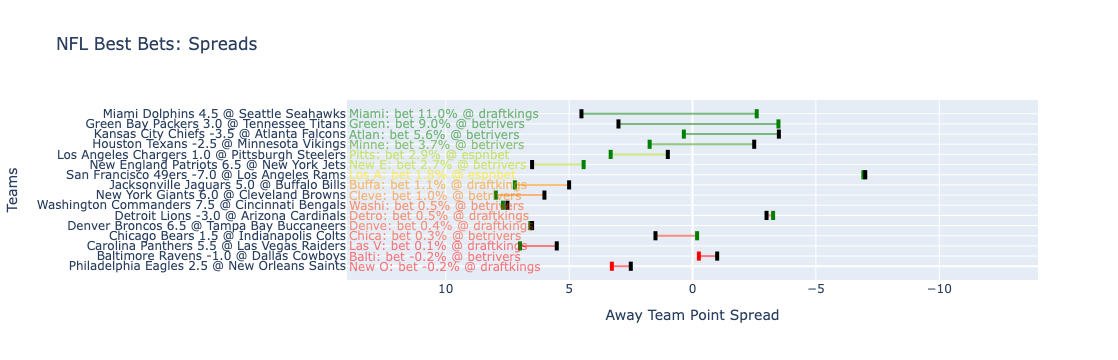

In [553]:
fig = go.Figure()
df = best_bets_spreads.sort_values(by=["expected_value"], ascending=True).reset_index(drop=True)
for i, game in df.iterrows():
    y = i
    
    # Highlight the difference (shaded area) with EV color
    fig.add_trace(go.Scatter(
        x=[game["away_spread"], 
           game["away_spread_modeled"], 
           game["away_spread_modeled"], 
           game["away_spread"]],
        y=[y - 0.1, y - 0.1, y + 0.1, y + 0.1],
        fill='toself',
        fillcolor=get_color_from_ev(game["expected_value"]),  # Use the color mapping function
        line=dict(color='rgba(255,255,255,0)'),  # No visible boundary
        name=f'EV: {np.round(game["expected_value"]*100, 1)}%',
        hovertemplate=f'EV: {game["expected_value"]*100:.1f}%<extra></extra>',
        hoverinfo="text"
    ))
    
    # Add the Modeled line
    color = "green" if game["expected_value"] > 0 else "red"
    fig.add_trace(go.Scatter(
        x=[game["away_spread_modeled"], game["away_spread_modeled"]],
        y=[y - 0.45, y + 0.45],
        mode='lines',
        line=dict(color=color, width=4),
        name=f'Modeled: {np.round(game["away_spread_modeled"], 1)}',  # Legend name (if shown)
        hovertemplate=f'Modeled: {np.round(game["away_spread_modeled"], 1)}<extra></extra>',  # Hover info
        hoverinfo="text"
    ))
    
    # Add the Vegas line
    fig.add_trace(go.Scatter(
        x=[game["away_spread"], game["away_spread"]],
        y=[y - 0.45, y + 0.45],
        mode='lines',
        line=dict(color='black', width=4),
        name=f'Vegas: {game["away_spread"]}',  # Legend name (if shown)
        hovertemplate=f'Vegas: {game["away_spread"]}<extra></extra>',  # Hover info
        hoverinfo="text"
    ))

    fig.add_annotation(
        x=14,  # Slightly to the right of the y-axis
        y=y,
        text=f'{game["outcome"][:5]}: bet {np.round(game["ideal_bet_pcnt_diluted"]*100, 1)}% @ {game["book"]}',  # Add outcome and bet percentage
        showarrow=False,
        font=dict(size=12, color=get_color_from_ev(game["expected_value"])),  # EV-based color
        xanchor='left',  # Text should be aligned just to the right of the y-axis
        yanchor='middle'
    )

# Update the layout with reversed x-axis and proper y-axis labels
fig.update_layout(
    xaxis=dict(range=[14, -14], title='Away Team Point Spread'),  # Reverse x-axis
    yaxis=dict(
        tickvals=np.arange(len(df)), 
        ticktext=df["game"], 
        title='Teams'
    ),
    title="NFL Best Bets: Spreads",
    showlegend=False  # Hide legend, if desired
)

# Save and display the figure
fig.write_html(f"../output/visualizations/predictions/{year}_{week}_spread_value.html")
fig.show()